# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:47<00:00, 2278.07it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingre

In [19]:
#Project essay word count

essay_word_count = []

for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)
    
project_data["essay_word_count"] = essay_word_count

In [20]:
project_data['preprocessed_essays'] = preprocessed_essays



In [21]:
import nltk
#nltk.download()


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

pos =[]
neg = []
neu = []
compound = []

for a in tqdm(project_data["preprocessed_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [14:03<00:00, 129.58it/s]


In [23]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [24]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also

# similarly you can preprocess the titles also

project_data.columns
#sent1= decontracted(project_data['project_title'].values[20000])
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 42227.68it/s]


In [25]:
#Project title word count
title_word_count = []

for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count


In [26]:
project_data['preprocessed_title'] = preprocessed_title

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_word_count',
       'preprocessed_essays', 'pos', 'neg', 'neu', 'compound',
       'title_word_count', 'preprocessed_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [28]:
Y=project_data['project_is_approved']

In [29]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
column_values=['clean_categories', 'clean_subcategories', 'school_state', 'project_grade_category', 'teacher_prefix','preprocessed_essays','preprocessed_title' ,'price','quantity','teacher_number_of_previously_posted_projects','pos','neg','neu','compound','title_word_count','essay_word_count']

def select_columns(dataframe, column_names):
    new_frame = dataframe.loc[:, column_names]
    return new_frame

process_columns=select_columns(project_data,column_values)

In [31]:
process_columns.head()

clean_categories                 clean_subcategories school_state  \
0       Math_Science  AppliedSciences Health_LifeScience           CA   
1       SpecialNeeds                        SpecialNeeds           UT   
2  Literacy_Language                            Literacy           CA   
3    AppliedLearning                    EarlyDevelopment           GA   
4  Literacy_Language                            Literacy           WA   

  project_grade_category teacher_prefix  \
0          Grades PreK-2           Mrs.   
1             Grades 3-5            Ms.   
2          Grades PreK-2           Mrs.   
3          Grades PreK-2           Mrs.   
4             Grades 3-5           Mrs.   

                                 preprocessed_essays  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   
2  having class 24 students comes diverse learner...   
3  i recently read article giving students choice...   
4  my students crave challenge eat obstacles brea...   

                                  preprocessed_title   price  quantity  \
0  my first graders eager learn world around they...  725.05         4   
1  my first graders eager learn world around they...  213.03         8   
2  my first graders eager learn world around they...  329.00         1   
3  my first graders eager learn world around they...  481.04         9   
4  my first graders eager learn world around they...   17.74        14   

   teacher_number_of_previously_posted_projects    pos    neg    neu  \
0                                            53  0.205  0.013  0.783   
1                                             4  0.248  0.072  0.680   
2                                            10  0.262  0.017  0.721   
3                                             2  0.187  0.030  0.783   
4                                             2  0.288  0.029  0.683   

   compound  title_word_count  essay_word_count  
0    0.9867                 6               285  
1    0.9897                 4               345  
2    0.9860                 7               177  
3    0.9524                 5               225  
4    0.9873                 7               184

In [32]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(process_columns, Y, test_size=0.33,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33 ,random_state=42) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(49041, 16) (49041,)
(24155, 16) (24155,)
(36052, 16) (36052,)


In [33]:
print("train columns",X_train.columns)

print("cv columns",X_cv.columns)

print("test columns",X_test.columns)

train columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')
cv columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')
test columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [34]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories= CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_categories.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_categories.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_categories.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_categories.transform(X_cv['clean_categories'].values)

print(vectorizer_categories.get_feature_names())

print("Shape of train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",categories_one_hot_cv.shape)

['History_Civics', 'Math_Science', 'Warmth', 'Music_Arts', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'AppliedLearning', 'Literacy_Language']
Shape of train matrix after one hot encodig  (49041, 9)
Shape of test matrix after one hot encodig  (36052, 9)
Shape of cv matrix after one hot encodig  (24155, 9)


In [35]:
# we use count vectorizer to convert the values into one 
# splitting subcategories data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(X_train['clean_subcategories'].values)

print(vectorizer_subcategories.get_feature_names())

sub_categories_one_hot_train = vectorizer_subcategories.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_subcategories.transform(X_cv['clean_subcategories'].values)

print("Shape of train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['Music', 'EarlyDevelopment', 'Warmth', 'PerformingArts', 'CharacterEducation', 'Economics', 'Extracurricular', 'Care_Hunger', 'Literacy', 'FinancialLiteracy', 'Civics_Government', 'ForeignLanguages', 'VisualArts', 'SocialSciences', 'AppliedSciences', 'College_CareerPrep', 'NutritionEducation', 'Mathematics', 'CommunityService', 'Health_Wellness', 'Other', 'EnvironmentalScience', 'History_Geography', 'SpecialNeeds', 'ParentInvolvement', 'Health_LifeScience', 'Literature_Writing', 'Gym_Fitness', 'ESL', 'TeamSports']
Shape of train matrix after one hot encodig  (49041, 30)
Shape of test matrix after one hot encodig  (36052, 30)
Shape of cv matrix after one hot encodig  (24155, 30)


In [36]:
# we use count vectorizer to convert the values of categorical data :school_state
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_schoolstate= CountVectorizer()
vectorizer_schoolstate.fit(X_train['school_state'])

print(vectorizer_schoolstate.get_feature_names())

school_state_one_hot_train = vectorizer_schoolstate.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer_schoolstate.transform(X_test['school_state'].values)
school_state_one_hot_cv = vectorizer_schoolstate.transform(X_cv['school_state'].values)

print("Shape of train matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",school_state_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",school_state_one_hot_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of train matrix after one hot encodig  (49041, 51)
Shape of test matrix after one hot encodig  (36052, 51)
Shape of cv matrix after one hot encodig  (24155, 51)


In [37]:
#we use count vectorizer to convert the values of categorical data :project_grade_category
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_project_grade_category = CountVectorizer(stop_words=None)

k=X_train['project_grade_category']
l=X_test['project_grade_category']
m=X_test['project_grade_category']

k.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)
l.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)
m.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)

vectorizer_project_grade_category.fit(k)

project_grade_category_one_hot_train=vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
project_grade_category_one_hot_test=vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)
project_grade_category_one_hot_cv=vectorizer_project_grade_category.transform(X_cv['project_grade_category'].values)

print("Shape of train matrix after one hot encodig ",project_grade_category_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",project_grade_category_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",project_grade_category_one_hot_cv.shape)

Shape of train matrix after one hot encodig  (49041, 4)
Shape of test matrix after one hot encodig  (36052, 4)
Shape of cv matrix after one hot encodig  (24155, 4)


In [38]:
#we use count vectorizer to convert the values of categorical data : teacher_prefix
# getting error as we have null balues replacing them with 0
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_teacher_prefix = CountVectorizer()
project_data['teacher_prefix'].unique()

X_train['teacher_prefix'].fillna("", inplace = True) 
X_test['teacher_prefix'].fillna("", inplace = True) 
X_cv['teacher_prefix'].fillna("", inplace = True) 

vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)
print(vectorizer_teacher_prefix.get_feature_names())

teacher_prefix_one_hot_train = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
teacher_prefix_one_hot_test = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)
teacher_prefix_one_hot_cv = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of train matrix after one hot encodig  (49041, 5)
Shape of test matrix after one hot encodig  (36052, 5)
Shape of cv matrix after one hot encodig  (24155, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [39]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_essay = CountVectorizer(min_df=10, ngram_range =(1,2),max_features=5000)
vectorizer_bow_essay.fit(X_train['preprocessed_essays'])

text_bow_train= vectorizer_bow_essay.transform(X_train['preprocessed_essays'])
text_bow_test= vectorizer_bow_essay.transform(X_test['preprocessed_essays'])
text_bow_cv= vectorizer_bow_essay.transform(X_cv['preprocessed_essays'])

print("Shape of train matrix after one hot encodig ",text_bow_train.shape)
print("Shape of test matrix after one hot encodig ",text_bow_test.shape)
print("Shape of cv matrix after one hot encodig ",text_bow_cv.shape)

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)


In [40]:
# before you vectorize the title make sure you preprocess it
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(X_train['preprocessed_title'])

title_bow_train = vectorizer_bow_title.transform(X_train['preprocessed_title'])
title_bow_test = vectorizer_bow_title.transform(X_test['preprocessed_title'])
title_bow_cv= vectorizer_bow_title.transform(X_cv['preprocessed_title'])

print("Shape of train matrix after one hot encodig title_bow",title_bow_train.shape)
print("Shape of test matrix after one hot encodig title_bow",title_bow_test.shape)
print("Shape of cv matrix after one hot encodig title_bow",title_bow_cv.shape)

Shape of train matrix after one hot encodig title_bow (49041, 91)
Shape of test matrix after one hot encodig title_bow (36052, 91)
Shape of cv matrix after one hot encodig title_bow (24155, 91)


#### 1.5.2.2 TFIDF vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay= TfidfVectorizer(min_df=10,ngram_range =(1,2),max_features=5000)
vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'])

text_tfidf_train= vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'])
text_tfidf_test= vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'])
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv['preprocessed_essays'])

print("Shape of train matrix after one hot encodig ",text_tfidf_train.shape)                                          
print("Shape of test matrix after one hot encodig ",text_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",text_tfidf_cv.shape)

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)


In [42]:
# Similarly you can vectorize for title also

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['preprocessed_title'])

title_tfidf_train = vectorizer_tfidf_title.transform(X_train['preprocessed_title'])
title_tfidf_test = vectorizer_tfidf_title.transform(X_test['preprocessed_title'])
title_tfidf_cv = vectorizer_tfidf_title.transform(X_cv['preprocessed_title'])

print("Shape of train matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of test matrix after one hot encodig ",title_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",title_tfidf_cv.shape)

Shape of train matrix after one hot encodig  (49041, 91)
Shape of test matrix after one hot encodig  (36052, 91)
Shape of cv matrix after one hot encodig  (24155, 91)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [43]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [44]:
i=0
list_of_sentance_train=[]
for sentance in X_train['preprocessed_essays']:
    list_of_sentance_train.append(sentance.split())

In [45]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=25,size=50, workers=32)

In [46]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 25 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 25 times  8649
sample words  ['interpreting', 'aunts', 'pi', 'copying', 'essential', 'clock', 'months', 'why', 'drink', 'laminator', 'products', 'thereby', 'rebuild', 'trays', 'craftsmanship', 'measurement', 'of', 'double', 'america', 'appreciative', 'related', 'extension', 'accomplishment', 'fidgeting', 'suite', 'officially', 'prolonged', 'buddy', 'just', 'disturbing', 'responsive', '65', 'tuba', 'dozen', 'enl', 'should', 'doodler', 'solid', 'versions', 'shy', 'accessible', 'alcohol', 'wishing', 'finally', 'humbled', 'boogie', 'democratic', 'parades', 'so', 'obtain']


In [47]:
# average Word2Vec of essays 
# compute average word2vec for each review.
essay_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_train.append(sent_vec)
essay_vectors_train = np.array(essay_vectors_train)
print(essay_vectors_train.shape)
print(essay_vectors_train[0])

100%|████████████████████████████████████████████████████████████████████████████| 49041/49041 [10:21<00:00, 78.85it/s]


(49041, 50)
[  2.88733157e-01   2.25645712e-02  -4.15554124e-01   2.48196211e-01
  -3.38467356e-01   6.97714622e-01   3.66172447e-01   2.44146186e-01
  -2.63223604e-01  -2.11439319e-02   5.82562015e-02  -4.75006442e-01
   3.82095884e-02  -1.10420318e-01   8.62577820e-01   9.58950147e-02
   5.50728073e-01   5.01772392e-01   7.35551658e-02   4.64027712e-01
  -3.42874304e-02  -3.04356971e-02  -9.05434189e-01   6.83861645e-01
   6.87739262e-01  -3.40346479e-03   1.18303412e-01  -6.48681901e-01
   5.10135000e-01   1.81270458e-01  -2.00621577e-01  -6.86639933e-01
  -3.83235099e-02  -1.36098982e-01  -3.47141194e-02  -1.84362520e-02
   6.25307878e-01   4.23872211e-01  -5.73806949e-01   5.68616605e-02
  -5.74697348e-01  -1.09395096e-04   9.07756366e-01  -6.50129323e-01
   5.98900452e-01   2.98029030e-01  -1.05230686e-01   4.62799526e-01
   2.20491416e-02   1.42447282e-01]


In [48]:
i=0
list_of_sentance_cv=[]
for sentance in X_cv['preprocessed_essays']:
    list_of_sentance_cv.append(sentance.split())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
essay_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_cv.append(sent_vec)
essay_vectors_cv = np.array(essay_vectors_cv)
print(essay_vectors_cv.shape)
print(essay_vectors_cv[0])

100%|████████████████████████████████████████████████████████████████████████████| 24155/24155 [05:15<00:00, 76.58it/s]


(24155, 50)
[-0.14482154 -0.10148159 -0.28502648  0.2047021  -0.04400741  0.46109453
  0.64576377  0.44342944 -0.17345139 -0.14893079  0.54237705 -0.51538111
  0.11414975 -0.11192193  1.65572621 -0.24841705  0.49206126  0.99520739
  0.34316678  0.69542043 -0.29818855  0.10222037 -0.52534564  0.70524068
  0.59970786 -0.04001337 -0.12716517 -0.16573622  0.64520975  0.09163128
  0.54805463 -0.34607461  0.15228543 -0.38687212 -0.17886899 -0.33021825
  0.49698328  0.35815404 -0.66652496  0.50244104 -0.53258172 -0.02800951
  0.688226   -1.1490356   0.36811097  0.78973555 -0.1483317   0.88721515
  0.00775862 -0.11880927]


In [50]:
i=0
list_of_sentance_test=[]
for sentance in X_test['preprocessed_essays']:
    list_of_sentance_test.append(sentance.split())

In [51]:
# average Word2Vec
# compute average word2vec for each review.
essay_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_test.append(sent_vec)
essay_vectors_test = np.array(essay_vectors_test)
print(essay_vectors_test.shape)
print(essay_vectors_test[0])

100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [07:32<00:00, 79.63it/s]


(36052, 50)
[-0.05970663  0.37212149 -0.12385039  0.29560316  0.08026161  0.06554122
 -0.13407761  0.01917517  0.19900559 -0.20443209  0.02010038 -0.35485477
 -0.26661756 -0.14737387  0.51537979  0.3678525  -0.10760744  0.53617822
 -0.2435165   0.77608518 -0.54951333 -0.0492195  -0.77403553  0.49806105
  0.68481802 -0.23838802  0.22087514 -0.80939399  0.44763504 -0.06014174
 -0.20251718 -0.37574948 -0.10370029 -0.04639424 -0.43998086 -0.3658297
  0.88761083  0.16967858 -0.79537274  0.2794137  -0.59156397 -0.0664116
  0.60271521 -0.60444753  0.90247799  0.31867063 -0.21869874  0.23277752
 -0.22960388  0.03877174]


In [53]:
#similarly doing it for preprocessed title
i=0
list_of_sentance_train=[]
for sentance in X_train['preprocessed_title']:
    list_of_sentance_train.append(sentance.split())

# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=16)

In [54]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  92
sample words  ['allow', 'text', 'always', 'interesting', 'not', 'eager', 'around', 'the', 'spark', 'my', 'economic', 'teach', 'class', 'these', 'used', 'standards', 'engaging', 'magazines', 'best', 'parents', 'first', 'nonfiction', 'afford', 'homes', 'curiosity', 'important', 'our', 'interest', 'videos', 'topics', 'online', 'genuinely', 'expose', 'past', 'school', 'day', 'learn', 'learners', 'also', 'literature', 'learning', 'graders', 'rigorous', 'know', 'based', 'using', 'children', 'discussions', 'lifelong', 'resources']


In [55]:
# compute average word2vec for each review.
title_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_train.append(sent_vec)
title_vectors_train = np.array(title_vectors_train)
print(title_vectors_train.shape)
print(title_vectors_train[0])

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:17<00:00, 2842.34it/s]


(49041, 50)
[ 0.01335082 -0.06752482 -0.188492    0.23493769 -0.34805973 -0.08886528
 -0.13654966  0.04670382  0.00193065 -0.21868129 -0.15091417  0.15832787
  0.07166903  0.22117644 -0.15852587 -0.12351918  0.09550928  0.04853213
  0.11685761  0.33382841  0.00634537  0.01452944 -0.08772848 -0.07551321
 -0.09017229 -0.242219    0.31304101  0.1522761   0.27134541 -0.05350978
 -0.01954492  0.05626335 -0.31575527  0.07925337  0.17848515  0.10272109
  0.0166621   0.06486782  0.18195607 -0.04300245 -0.2491038   0.26169842
  0.13827384 -0.21004284 -0.34931823  0.30414873  0.05470586  0.11673854
  0.29092721 -0.10591897]


In [57]:
# compute average word2vec for each review.
title_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_cv.append(sent_vec)
title_vectors_cv = np.array(title_vectors_cv)
print(title_vectors_cv.shape)
print(title_vectors_cv[0])

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:08<00:00, 2754.32it/s]


(24155, 50)
[ 0.01335082 -0.06752482 -0.188492    0.23493769 -0.34805973 -0.08886528
 -0.13654966  0.04670382  0.00193065 -0.21868129 -0.15091417  0.15832787
  0.07166903  0.22117644 -0.15852587 -0.12351918  0.09550928  0.04853213
  0.11685761  0.33382841  0.00634537  0.01452944 -0.08772848 -0.07551321
 -0.09017229 -0.242219    0.31304101  0.1522761   0.27134541 -0.05350978
 -0.01954492  0.05626335 -0.31575527  0.07925337  0.17848515  0.10272109
  0.0166621   0.06486782  0.18195607 -0.04300245 -0.2491038   0.26169842
  0.13827384 -0.21004284 -0.34931823  0.30414873  0.05470586  0.11673854
  0.29092721 -0.10591897]


In [59]:
i=0
list_of_sentance_test=[]
for sentance in X_test['preprocessed_title']:
    list_of_sentance_test.append(sentance.split())

# compute average word2vec for each review.
title_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_test.append(sent_vec)
title_vectors_test = np.array(title_vectors_test)
print(title_vectors_test.shape)
print(title_vectors_test[0])

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:12<00:00, 2938.74it/s]


(36052, 50)
[ 0.01335082 -0.06752482 -0.188492    0.23493769 -0.34805973 -0.08886528
 -0.13654966  0.04670382  0.00193065 -0.21868129 -0.15091417  0.15832787
  0.07166903  0.22117644 -0.15852587 -0.12351918  0.09550928  0.04853213
  0.11685761  0.33382841  0.00634537  0.01452944 -0.08772848 -0.07551321
 -0.09017229 -0.242219    0.31304101  0.1522761   0.27134541 -0.05350978
 -0.01954492  0.05626335 -0.31575527  0.07925337  0.17848515  0.10272109
  0.0166621   0.06486782  0.18195607 -0.04300245 -0.2491038   0.26169842
  0.13827384 -0.21004284 -0.34931823  0.30414873  0.05470586  0.11673854
  0.29092721 -0.10591897]


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [60]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays')
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [62]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:23<00:00, 686.99it/s]


49041
300


In [63]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:02<00:00, 579.64it/s]


36052
300


In [64]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:42<00:00, 564.32it/s]


24155
300


In [65]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [66]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [00:53<00:00, 921.53it/s]


49041
300


In [67]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:39<00:00, 923.80it/s]


36052
300


In [68]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:26<00:00, 901.75it/s]


24155
300


### 1.5.3 Vectorizing Numerical features

In [69]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [70]:
#scaling of price feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
price_standardized_train= price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_test= price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_standardized_cv= price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

print("After vectorizations")
print(price_standardized_train.shape, y_train.shape)
print(price_standardized_test.shape, y_test.shape)
print(price_standardized_cv.shape, y_cv.shape)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [71]:
#scaling of qunatity feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = Normalizer()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
quantity_standardized_train= quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_standardized_test= quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_standardized_cv= quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

print("After vectorizations")
print(quantity_standardized_train.shape, y_train.shape)
print(quantity_standardized_test.shape, y_test.shape)
print(quantity_standardized_cv.shape, y_cv.shape)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [72]:
#scaling of teachers number of previously posted projects  

from sklearn.preprocessing import Normalizer

normalizer_projects_num = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer_projects_num.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer_projects_num.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer_projects_num.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer_projects_num.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [73]:

# normalixing the title word count

from sklearn.preprocessing import Normalizer

normalizer_title_word = Normalizer()

normalizer_title_word.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer_title_word.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer_title_word.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer_title_word.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [74]:
# normalixing the essay word count

from sklearn.preprocessing import Normalizer

normalizer_ess_count = Normalizer()

normalizer_ess_count.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer_ess_count.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer_ess_count.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer_ess_count.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [75]:
#normalizing the data for  essay sentiment-pos
from sklearn.preprocessing import Normalizer
normalizer_pos = Normalizer()

normalizer_pos.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer_pos.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer_pos.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer_pos.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [76]:
#normalizing the data for  essay sentiment-neg
from sklearn.preprocessing import Normalizer

normalizer_neg= Normalizer()

normalizer_neg.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer_neg.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer_neg.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer_neg.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [77]:
#normalizing the data for  essay sentiment-neu
from sklearn.preprocessing import Normalizer

normalizer_nue= Normalizer()

normalizer_nue.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_nue_train = normalizer_nue.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_nue_cv = normalizer_nue.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_nue_test = normalizer_nue.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_nue_train.shape, y_train.shape)
print(essay_sent_nue_cv.shape, y_cv.shape)
print(essay_sent_nue_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [78]:
#normalizing the data for  essay sentiment-compound
from sklearn.preprocessing import Normalizer

normalizer_compound= Normalizer()

normalizer_compound.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer_compound.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer_compound.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer_compound.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [79]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

X_1 = hstack((school_state_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train))
X_cat_train=hstack((X_1,teacher_prefix_one_hot_train,project_grade_category_one_hot_train))


X_2 = hstack((school_state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test))
X_cat_test=hstack((X_2,teacher_prefix_one_hot_test,project_grade_category_one_hot_test))

X_3 = hstack((school_state_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv))
X_cat_cv=hstack((X_3,teacher_prefix_one_hot_cv,project_grade_category_one_hot_cv))

#dealing with numerical values
#considering the value of price standardized values

price_standardized_train = pd.DataFrame({'price_standard_train':price_standardized_train[:,0]})
price_standardized_test = pd.DataFrame({'price_standard_test':price_standardized_test[:,0]})
price_standardized_cv = pd.DataFrame({'price_standard_cv':price_standardized_cv[:,0]})


#combining numerical ,project_title(BOW)  and preprocessed_essay (BOW)
num_text_train=hstack((price_standardized_train,text_bow_train,title_bow_train))
num_text_test=hstack((price_standardized_test,text_bow_test,title_bow_test))
num_text_cv=hstack((price_standardized_cv,text_bow_cv,title_bow_cv))

#froming features for set1

set1_train=hstack((X_cat_train,num_text_train))
set1_test=hstack((X_cat_test,num_text_test))
set1_cv=hstack((X_cat_cv,num_text_cv))

#numerical + project_title(TFIDF)+ preprocessed_essay (TFIDF)
num_tfidf_train=hstack((price_standardized_train,text_tfidf_train,title_tfidf_train))
num_tfidf_test=hstack((price_standardized_test,text_tfidf_test,title_tfidf_test))
num_tfidf_cv=hstack((price_standardized_cv,text_tfidf_cv,title_tfidf_cv))

#froming features for set2

set2_train=hstack((X_cat_train,num_tfidf_train))
set2_test=hstack((X_cat_test,num_tfidf_test))
set2_cv=hstack((X_cat_cv,num_tfidf_cv))

#numerical + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
num_w2v_train=hstack((price_standardized_train,essay_vectors_train,title_vectors_train))
num_w2v_test=hstack((price_standardized_test,essay_vectors_test,title_vectors_test))
num_w2v_cv=hstack((price_standardized_cv,essay_vectors_cv,title_vectors_cv))

#forming features for set3

set3_train=hstack((X_cat_train,num_w2v_train))
set3_test=hstack((X_cat_test,num_w2v_test))
set3_cv=hstack((X_cat_cv,num_w2v_cv))

#numerical+project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
num_tfidfw2v_train=hstack((price_standardized_train,tfidf_w2v_vectors_train,tfidf_w2v_title_train))
num_tfidfw2v_test=hstack((price_standardized_test,tfidf_w2v_vectors_test,tfidf_w2v_title_test))
num_tfidfw2v_cv=hstack((price_standardized_cv,tfidf_w2v_vectors_cv,tfidf_w2v_title_cv))

#forming features for set4


set4_train=hstack((X_cat_train,num_tfidfw2v_train))
set4_test=hstack((X_cat_test,num_tfidfw2v_test))
set4_cv=hstack((X_cat_cv,num_tfidfw2v_cv))

#y values are
#y_train
#y_test
#y_cv

__ Computing Sentiment Scores__

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

In [155]:
from sklearn.externals import joblib

joblib.dump(my_model,"my_model.pkl")

NameError: name 'my_model' is not defined

<h1>2. Logistic Regression </h1>

#  Brute force on set 1

In [138]:
#Since it is logistic regression we have both L1 and L2 penalty 
#hyperparemeter C which is inverse of alpha
#
#C=1/alpha
# variables ready

X_tr=set1_train.tocsr()
X_cr=set1_cv.tocsr()
X_te=set1_test.tocsr()

# Set1:doing Logistic regression with  L2 penalty

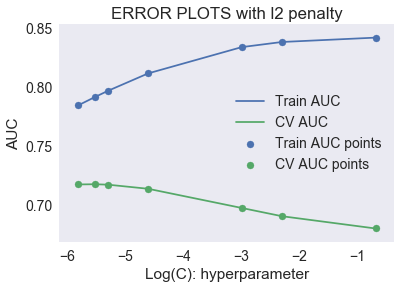

Wall time: 38.7 s


In [180]:
%%time

#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
# 
y_train_pred = batch_predict(classifier, X_tr)    
    y_test_pred = batch_predict(classifier, X_te)
   
#
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005,0.004,0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l2')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()


In [299]:
# We could see that the best hyperparameter for log(C) is -6
import math
k_best=math.pow(2.718281,-6)


In [300]:
k_best

0.0024787567094123678

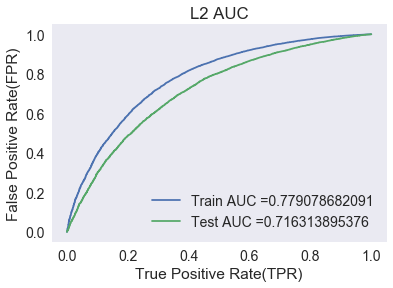

In [189]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = k_best, penalty='l2')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [190]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [191]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.265
[[ 3752  3752]
 [ 5157 36380]]


In [192]:
conf_matr_df_trainl2_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.265


Text(0.5,1,'Confusion matrix -Train data-L2')

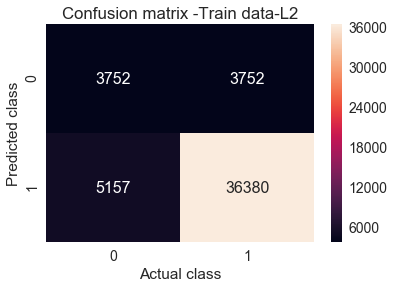

In [193]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data-L2")


In [194]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.208
[[ 3118  2309]
 [ 7710 22915]]


In [195]:
conf_matr_df_testl2_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.208


Text(0.5,1,'Confusion matrix -Test data-L2')

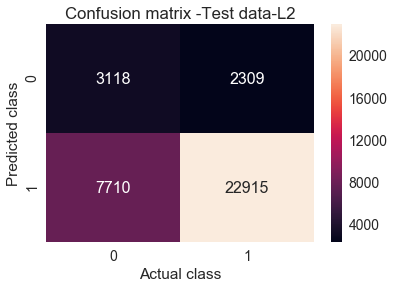

In [196]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-L2")

# Set1:doing Logistic regression with  L1 penalty

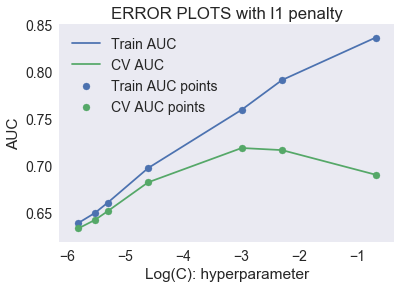

Wall time: 17.5 s


In [197]:
%%time
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l1')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [297]:
# We could see that the best hyperparameter for log(C) is -3  for l1 penalty 
import math
k_best=math.pow(2.718281,-3)

In [298]:
k_best

0.0497871138891618

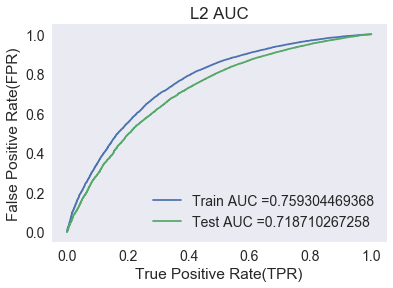

In [199]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = LogisticRegression(C = k_best, penalty='l1')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [200]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.262
[[ 3752  3752]
 [ 5825 35712]]


In [201]:
conf_matr_df_trainl1_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.262


Text(0.5,1,'Confusion matrix -set1 Train data-L1')

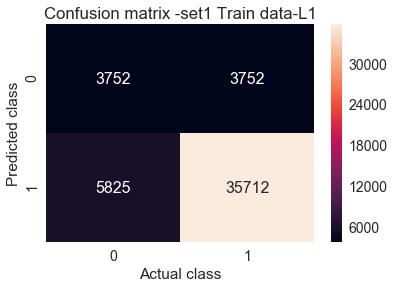

In [202]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set1 Train data-L1")


In [203]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.197
[[ 3339  2088]
 [ 8754 21871]]


In [204]:
conf_matr_df_testl1_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.197


Text(0.5,1,'Confusion matrix -set 1:Test data-L1')

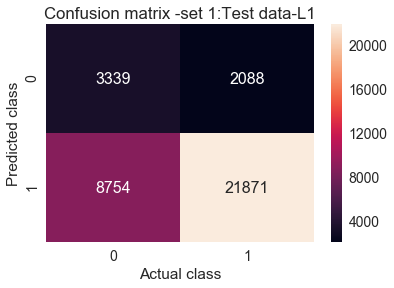

In [205]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 1:Test data-L1")

#  Brute force on set 2

In [206]:
#Since it is logistic regression we have both L1 and L2 penalty 
#hyperparemeter C which is inverse of alpha
#
#C=1/alpha
# variables ready

X_tr=set2_train.tocsr()
X_cr=set2_cv.tocsr()
X_te=set2_test.tocsr()

# Set2:doing Logistic regression with  L2 penalty

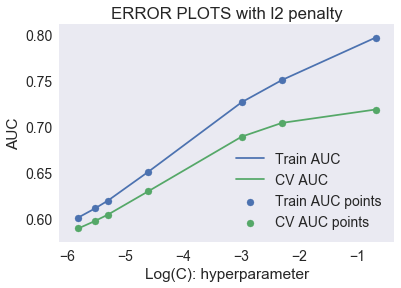

Wall time: 16.9 s


In [207]:
%%time

#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
# 
y_train_pred = batch_predict(classifier, X_tr)    
    y_test_pred = batch_predict(classifier, X_te)
   
#
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l2')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()


In [295]:
# We could see that the best hyperparameter for log(C) is -2
import math
k_best=math.pow(2.718281,-2)


In [296]:
k_best

0.13533536572974464

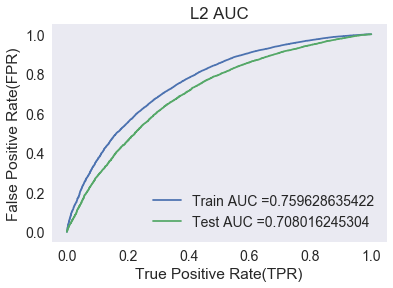

In [209]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = k_best, penalty='l2')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [210]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.231
[[ 3752  3752]
 [ 6088 35449]]


In [211]:
conf_matr_df_trainl2_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.231


Text(0.5,1,'Confusion matrix -Train data-L2')

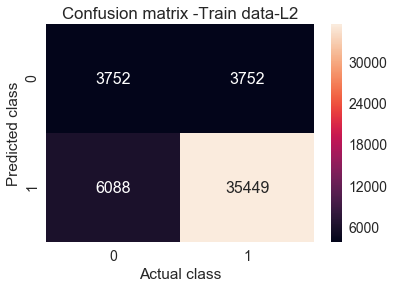

In [212]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data-L2")


In [213]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.188
[[ 3265  2162]
 [ 8822 21803]]


In [214]:
conf_matr_df_testl2_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.188


Text(0.5,1,'Confusion matrix -Test data-L2')

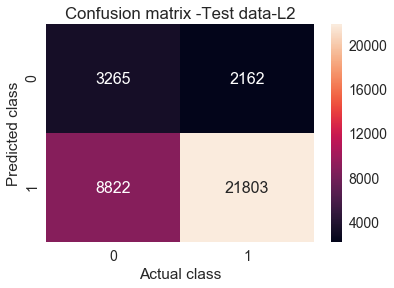

In [215]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-L2")

# Set2:doing Logistic regression with  L1 penalty

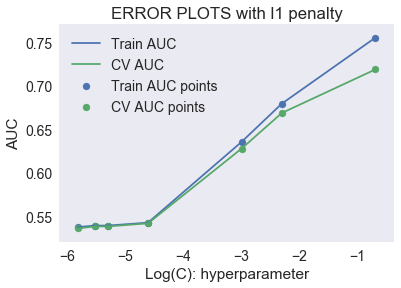

Wall time: 13.5 s


In [216]:
%%time
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l1')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [217]:
# We could see that the best hyperparameter for log(C) is -1
import math
k_best=math.pow(2.718281,-1)


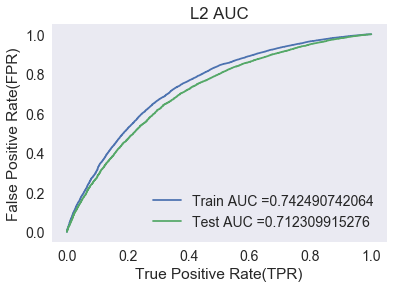

In [218]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = LogisticRegression(C = k_best, penalty='l1')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L1 AUC")
plt.grid()
plt.show()

# confusion matrix

In [219]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.241
[[ 3752  3752]
 [ 6576 34961]]


In [220]:
conf_matr_df_trainl1_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.241


Text(0.5,1,'Confusion matrix -set2 Train data-L1')

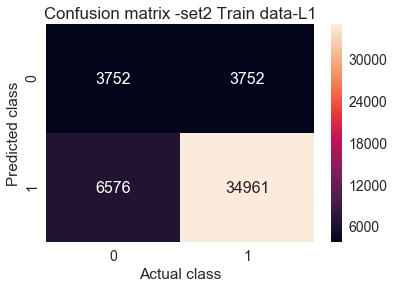

In [221]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set2 Train data-L1")


In [222]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.187
[[ 3426  2001]
 [ 9365 21260]]


In [223]:
conf_matr_df_testl1_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.187


Text(0.5,1,'Confusion matrix -set 2:Test data-L1')

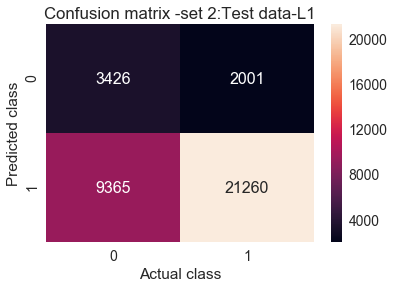

In [224]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 2:Test data-L1")

#  Brute force on set 3

In [225]:
#Since it is logistic regression we have both L1 and L2 penalty 
#hyperparemeter C which is inverse of alpha
#
#C=1/alpha
# variables ready

X_tr=set3_train.tocsr()
X_cr=set3_cv.tocsr()
X_te=set3_test.tocsr()

# Set3:doing Logistic regression with  L1 penalty

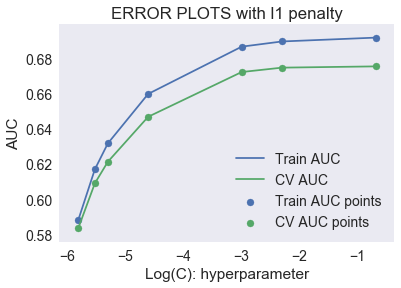

Wall time: 22.2 s


In [226]:
%%time
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l1')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [227]:
# We could see that the best hyperparameter for log(C) is -2.5
import math
k_best=math.pow(2.718281,-2.5)


In [294]:
k_best

0.08208506116717074

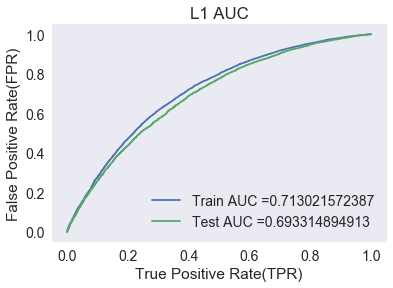

In [246]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = LogisticRegression(C = k_best, penalty='l1')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L1 AUC")
plt.grid()
plt.show()

# confusion matrix

In [229]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.213
[[ 3752  3752]
 [ 9434 32103]]


In [230]:
conf_matr_df_trainl1_3= pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.213


Text(0.5,1,'Confusion matrix -set3 Train data-L1')

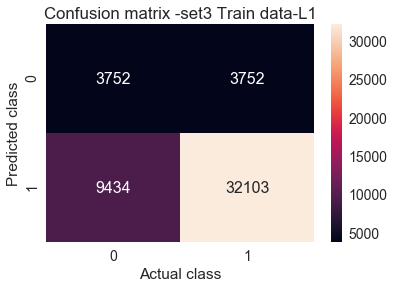

In [231]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set3 Train data-L1")


In [232]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.166
[[ 3456  1971]
 [11730 18895]]


In [233]:
conf_matr_df_testl1_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.166


Text(0.5,1,'Confusion matrix -set 3:Test data-L1')

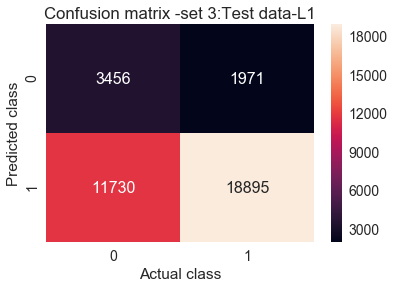

In [234]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 3:Test data-L1")

# Set3:doing Logistic regression with  L2 penalty

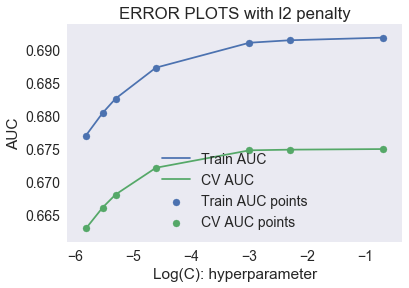

Wall time: 8.07 s


In [235]:
%%time

#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
# 
y_train_pred = batch_predict(classifier, X_tr)    
    y_test_pred = batch_predict(classifier, X_te)
   
#
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l2')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()


In [236]:
# We could see that the best hyperparameter for log(C) is -1
import math
k_best=math.pow(2.718281,-1)


In [292]:
k_best

0.367879553291216

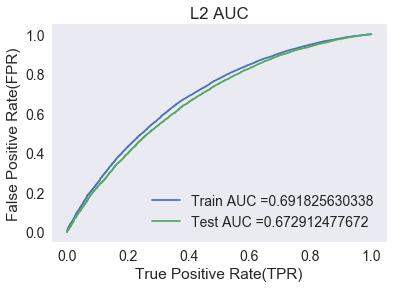

In [237]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = k_best, penalty='l2')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [238]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.216
[[ 3752  3752]
 [ 9319 32218]]


In [239]:
conf_matr_df_trainl2_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.216


Text(0.5,1,'Confusion matrix -set 3 Train data-L2')

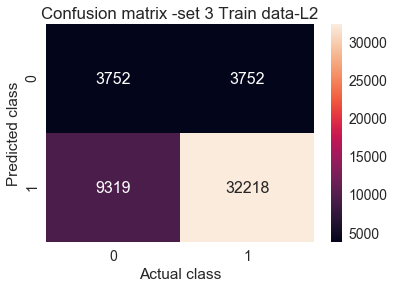

In [240]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 3 Train data-L2")


In [241]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.165
[[ 3430  1997]
 [11601 19024]]


In [242]:
conf_matr_df_testl2_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.165


Text(0.5,1,'Confusion matrix -set 3 Test data-L2')

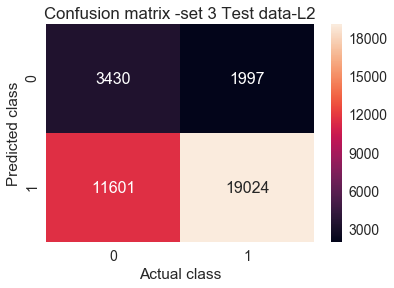

In [243]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 3 Test data-L2")

# brute force on set 4

In [256]:
#Since it is logistic regression we have both L1 and L2 penalty 
#hyperparemeter C which is inverse of alpha
#
#C=1/alpha
# variables ready

X_tr=set4_train.tocsr()
X_cr=set4_cv.tocsr()
X_te=set4_test.tocsr()

# Set4:doing Logistic regression with  L1 penalty

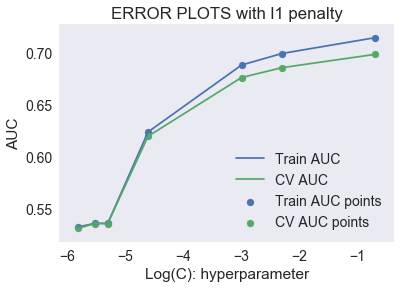

Wall time: 1min 35s


In [247]:
%%time
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l1')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [248]:
# We could see that the best hyperparameter for log(C) is -1
import math
k_best=math.pow(2.718281,-1)


In [290]:
k_best

0.367879553291216

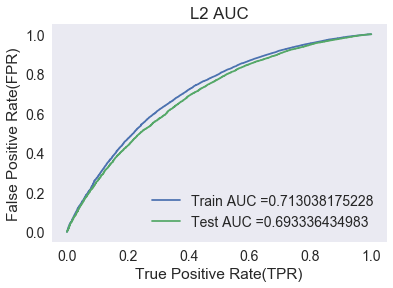

In [249]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = LogisticRegression(C = k_best, penalty='l1')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# confusion matrix

In [250]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.231
[[ 3752  3752]
 [ 8345 33192]]


In [251]:
conf_matr_df_trainl1_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.231


Text(0.5,1,'Confusion matrix -set4 Train data-L1')

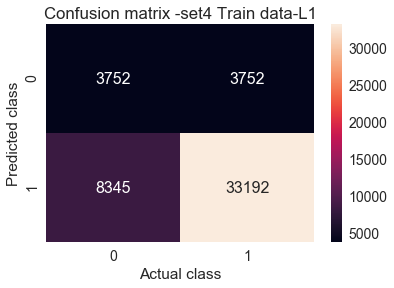

In [252]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_4, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set4 Train data-L1")


In [253]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.182
[[ 3374  2053]
 [10367 20258]]


In [254]:
conf_matr_df_testl1_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.182


Text(0.5,1,'Confusion matrix -set 4:Test data-L1')

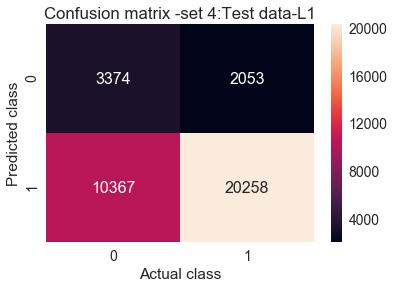

In [255]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_4, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 4:Test data-L1")

# Set4:doing Logistic regression with  L2 penalty

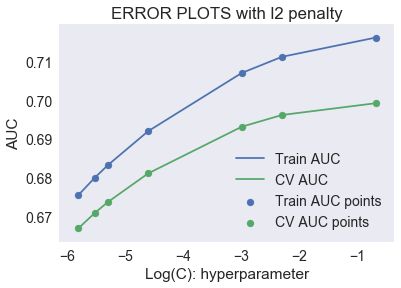

Wall time: 32.4 s


In [257]:
%%time

#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
# 
y_train_pred = batch_predict(classifier, X_tr)    
    y_test_pred = batch_predict(classifier, X_te)
   
#
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l2')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()


In [258]:
# We could see that the best hyperparameter for log(C) is -1
import math
k_best=math.pow(2.718281,-1)


In [288]:
k_best

0.367879553291216

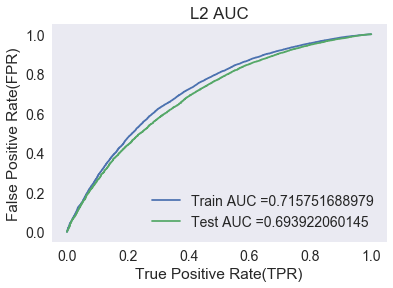

In [259]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = k_best, penalty='l2')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# confusion matrix

In [260]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249999982241 for threshold -0.235
[[ 3753  3751]
 [ 8103 33434]]


In [261]:
conf_matr_df_trainl2_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999982241 for threshold -0.235


Text(0.5,1,'Confusion matrix -set 4 Train data-L2')

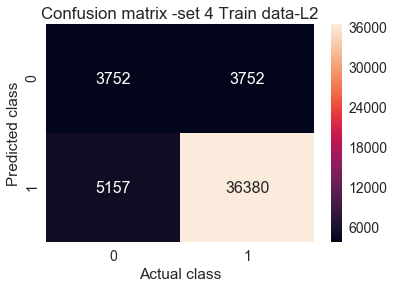

In [262]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 4 Train data-L2")


In [263]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.18
[[ 3382  2045]
 [10472 20153]]


In [264]:
conf_matr_df_testl2_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.18


Text(0.5,1,'Confusion matrix -set 4 Test data-L2')

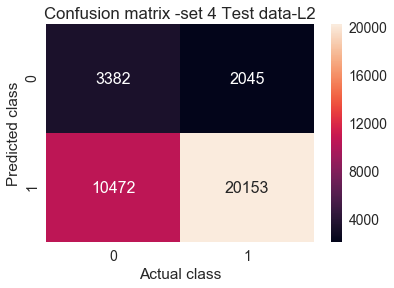

In [265]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_4, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 4 Test data-L2")

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [266]:
#preparing data

#  we have categorical data as X_cat_train

X_tr=hstack((X_cat_train,price_standardized_train,essay_word_count_train,prev_projects_train,title_word_count_train,quantity_standardized_train,essay_sent_pos_train,essay_sent_nue_train,essay_sent_neg_train,essay_sent_comp_train)).tocsr()

#  we have categorical data as X_cat_test

X_te=hstack((X_cat_test,price_standardized_test,quantity_standardized_test,prev_projects_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_nue_test,essay_sent_neg_test,essay_sent_comp_test)).tocsr()

#  we have categorical data as X_cat_cv

X_cr=hstack((X_cat_cv,price_standardized_cv,quantity_standardized_cv,prev_projects_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_nue_cv,essay_sent_neg_cv,essay_sent_comp_cv)).tocsr()


# Set5:doing Logistic regression with  L1 penalty

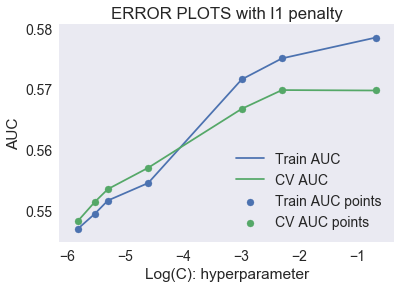

Wall time: 2.49 s


In [267]:
%%time
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l1')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [268]:
# We could see that the best hyperparameter for log(C) is -2.5
import math
k_best=math.pow(2.718281,-2.5)


In [269]:
k_best

0.08208506116717074

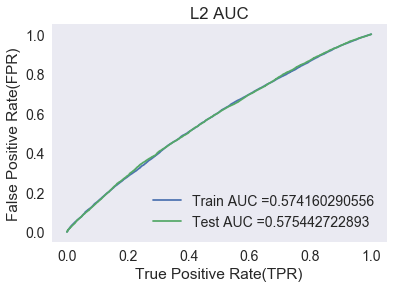

In [270]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = LogisticRegression(C = k_best, penalty='l1')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [271]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.173
[[ 3752  3752]
 [16350 25187]]


In [272]:
conf_matr_df_trainl1_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.173


Text(0.5,1,'Confusion matrix -set1 Train data-L1')

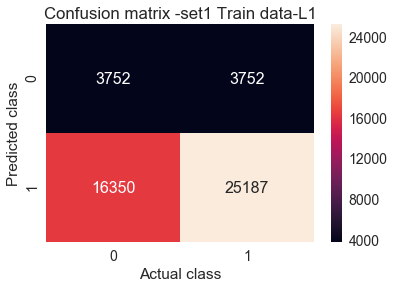

In [273]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set1 Train data-L1")


In [274]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.166
[[ 3020  2407]
 [13797 16828]]


In [275]:
conf_matr_df_testl1_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.166


Text(0.5,1,'Confusion matrix -set 5:Test data-L1')

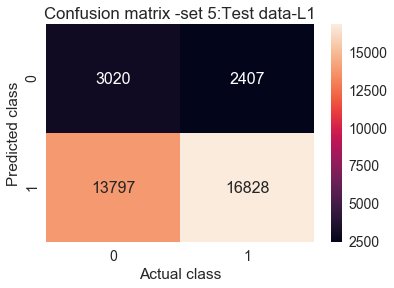

In [276]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 5:Test data-L1")

# Set5:doing Logistic regression with  L2 penalty

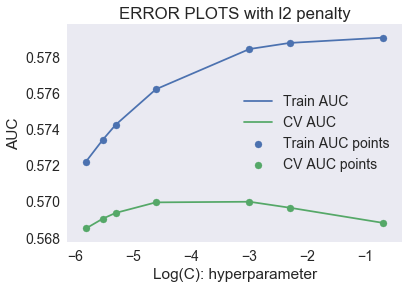

Wall time: 1.67 s


In [277]:
%%time

#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
# 
y_train_pred = batch_predict(classifier, X_tr)    
    y_test_pred = batch_predict(classifier, X_te)
   
#
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=LogisticRegression(C= i,penalty='l2')
    classifier.fit(X_tr, y_train)
    y_train_pred = classifier.predict_log_proba(X_tr)[:,1]    
    y_cv_pred = classifier.predict_log_proba(X_cr)[:,1] 
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()


In [278]:
# We could see that the best hyperparameter for log(C) is -5.2
import math
k_best=math.pow(2.718281,-5.2)


In [279]:
k_best

0.0055165731635299

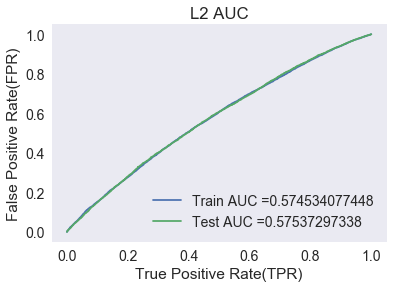

In [280]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = k_best, penalty='l2')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_log_proba(X_tr)[:,1]    
y_test_pred = model.predict_log_proba(X_te)[:,1] 


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

# confusion matrix

In [281]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold -0.172
[[ 3752  3752]
 [16343 25194]]


In [282]:
conf_matr_df_trainl2_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold -0.172


Text(0.5,1,'Confusion matrix -Train data-L2')

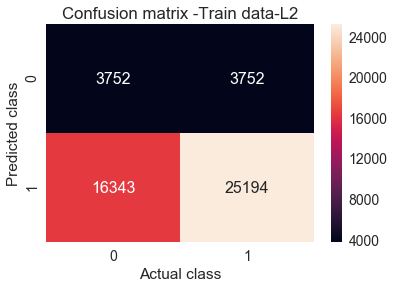

In [283]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data-L2")


In [284]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.163
[[ 3231  2196]
 [14995 15630]]


In [285]:
conf_matr_df_testl2_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999991512 for threshold -0.163


Text(0.5,1,'Confusion matrix -set 5 Test data-L2')

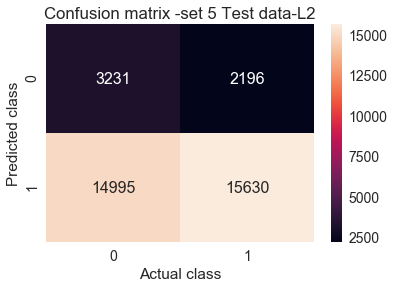

In [286]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 5 Test data-L2")

<h1>3. Conclusion</h1>

In [302]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "penalty","Train AUC","Test AUC"]

x.add_row(["BOW", "Logistic Regression", "l1", 0.049, 0.75, 0.71])
x.add_row(["BOW", "Logistic Regression", "l2", 0.002, 0.77, 0.71])

x.add_row(["TFIDF", "Logistic Regression", "l1", 0.367, 0.74, 0.71])
x.add_row(["TFIDF", "Logistic Regression", "l2", 0.135, 0.75, 0.70])

x.add_row(["AVG W2V", "Logistic Regression", "l1", 0.082, 0.71, 0.69])
x.add_row(["AVG W2V", "Logistic Regression", "l2", 0.367, 0.69, 0.67])

x.add_row(["TFIDF W2V", "Logistic Regression", "l1", 0.367, 0.71, 0.69])
x.add_row(["TFIDF W2V", "Logistic Regression", "l2", 0.367, 0.71, 0.69])

x.add_row(["WITHOUT TEXT", "Logistic Regression", "l1", 0.082, 0.57, 0.57])
x.add_row(["WITHOUT TEXT", "Logistic Regression", "l2", 0.005, 0.57, 0.57])


print(x)

+--------------+---------------------+-----------------------+---------+-----------+----------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter | penalty | Train AUC | Test AUC |
+--------------+---------------------+-----------------------+---------+-----------+----------+
|     BOW      | Logistic Regression |           l1          |  0.049  |    0.75   |   0.71   |
|     BOW      | Logistic Regression |           l2          |  0.002  |    0.77   |   0.71   |
|    TFIDF     | Logistic Regression |           l1          |  0.367  |    0.74   |   0.71   |
|    TFIDF     | Logistic Regression |           l2          |  0.135  |    0.75   |   0.7    |
|   AVG W2V    | Logistic Regression |           l1          |  0.082  |    0.71   |   0.69   |
|   AVG W2V    | Logistic Regression |           l2          |  0.367  |    0.69   |   0.67   |
|  TFIDF W2V   | Logistic Regression |           l1          |  0.367  |    0.71   |   0.69   |
|  TFIDF W2V   | Logistic Regression |  

Summary:
It is clearly visible that Text data contained in the Essays and Essay Titles indeed play a major role in predicting the outcome of the project. 
